Perguntas de pesquisa que irão guiar essa investigação

Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre os níveis e formação ?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre pessoas mais e menos experientes ?
Será que existem diferenças enrtre os níveis de adaptação, satisfação e burnout entre pessoas mais velhas e mais novas?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout e as funções realizadas nos projetos?

In [53]:
import pandas as pd
from scipy.stats import mannwhitneyu
#import matplotlib.pyplot as plt
import seaborn as sns
dados = pd.read_excel('/home/danilo/Documentos/GitHub/PesquisaIdade/data/idade.xlsx')
dados.head()
dados.columns


Index(['sexo', 'idade', 'formacao', 'curso', 'anoFormacao',
       'tempoProfissional', 'tempoFuncao', 'funcao', 'metodologia',
       'existenciaProjeto', 'mesesNoProjeto',
       '@12.Emrelaçãoassuascaracterísticasporfavorresponda', 'S1', 'S2', 'S3',
       'C2', 'C3', 'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4',
       'T2', 'I2', 'I1', 'I4', 'I3',
       '@13.Pararesponderasquestõesabaixoconsidereseuprojetoatua', 'equipe1',
       'reque1', 'reque2', 'reque3', 'tec1', 'req4', 'tec2', 'tec3', 'tec4',
       'req5', 'equipe2', 'equipe3', 'req6', 'tec5', 'tec6', 'req7', 'equipe4',
       '@14.Emrelaçãoaoseudiaadiadotrabalho', 'ci2', 'et6', 'ci3', 'satXet6',
       'ee6', 'ee2', 'et5', 'ci1', 'et4', 'ee1', 'et1', 'et2', 'et3', 'ee3',
       'ci4', 'ee5', '@15.Emrelaçãoasuasatisfaçãocomotrabalho', 'sat1',
       'sat2'],
      dtype='object')

In [54]:

dados['Gerenciamento_Stress'] = (dados['S1']+dados['S2']+dados['S3'])
dados['Resolucao_Problemas'] = (dados['C1']+dados['C2']+dados['C3']+dados['C4'])
dados['Gerenciamento_Emergencia'] = (dados['EM1']+dados['EM2']+dados['EM3'])
dados['Aprendizado'] = (dados['T1']+dados['T2']+dados['T3']+dados['T4'])
dados['Interpersoal'] = (dados['I1']+dados['I2']+dados['I3']+dados['I4'])
dados['satisfacao']= (dados['sat1']+dados['sat2']+dados['satXet6'])
dados['Burnout_cinismo'] = (dados['ci1']+dados['ci2']+dados['ci3']+dados['ci4'])
dados['Burnout_exaustao'] = (dados['ee1']+dados['ee2']+dados['ee3']+dados['ee5']+dados['ee6'])
dados['Burnout_eficacia'] = (dados['et1']+dados['et2']+dados['et3']+dados['et4']+dados['et5']+dados['satXet6'])
dados['instabilidade_equipe'] = (dados['equipe1']+dados['equipe2']+dados['equipe3']+dados['equipe4'])
dados['instabilidade_tecnica'] = (dados['tec1']+dados['tec2']+dados['tec3']+dados['tec4'])
dados['instabilidade_tarefa'] = (dados['reque1']+dados['reque2']+dados['reque3']+dados['req4']+dados['req5']+dados['req6']+dados['req7'])

dados.columns

labels = ['@12.Emrelaçãoassuascaracterísticasporfavorresponda', 'S1', 'S2', 'S3',
          'C2', 'C3', 'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4',
          'T2', 'I2', 'I1', 'I4', 'I3',
          '@13.Pararesponderasquestõesabaixoconsidereseuprojetoatua', 'equipe1',
          'reque1', 'reque2', 'reque3', 'tec1', 'req4', 'tec2', 'tec3', 'tec4',
          'req5', 'equipe2', 'equipe3', 'req6', 'tec5', 'tec6', 'req7', 'equipe4',
          '@14.Emrelaçãoaoseudiaadiadotrabalho', 'ci2', 'et6', 'ci3', 'satXet6',
          'ee6', 'ee2', 'et5', 'ci1', 'et4', 'ee1', 'et1', 'et2', 'et3', 'ee3',
          'ci4', 'ee5', '@15.Emrelaçãoasuasatisfaçãocomotrabalho', 'sat1', 'sat2']
dados.drop(columns = labels, inplace=True)
dados.columns
dados.corr(method='spearman')

,idade,anoFormacao,existenciaProjeto,mesesNoProjeto,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
idade,1.000000,-0.604246,-0.038008,0.044196,0.065809,0.092102,0.091165,0.034707,-0.031924,0.054575,-0.054297,-0.090982,0.093197,-0.015137,-0.053131,0.006292
anoFormacao,-0.604246,1.000000,-0.055865,-0.091173,-0.064939,-0.056600,-0.042132,0.033917,0.056489,0.049757,-0.015188,0.037997,-0.011791,0.059261,0.105344,-0.036604
existenciaProjeto,-0.038008,-0.055865,1.000000,0.649208,-0.022284,0.026260,-0.018407,-0.087585,-0.017734,-0.065681,0.041288,0.014865,-0.072429,0.099525,-0.019686,0.054758
mesesNoProjeto,0.044196,-0.091173,0.649208,1.000000,0.010975,0.035419,0.059108,-0.111965,-0.041723,-0.085080,0.052443,0.038085,-0.005952,0.133626,0.019895,0.197101
Gerenciamento_Stress,0.065809,-0.064939,-0.022284,0.010975,1.000000,0.525293,0.556379,0.448070,0.458993,0.267727,-0.215274,-0.243816,0.396173,-0.010342,-0.095346,-0.025156
Resolucao_Problemas,0.092102,-0.056600,0.026260,0.035419,0.525293,1.000000,0.514446,0.501237,0.401678,0.221208,-0.192388,-0.213846,0.392838,-0.045055,-0.056322,-0.005003
Gerenciamento_Emergencia,0.091165,-0.042132,-0.018407,0.059108,0.556379,0.514446,1.000000,0.394188,0.409914,0.229737,-0.204450,-0.181903,0.429710,-0.003442,-0.033127,-0.008335
Aprendizado,0.034707,0.033917,-0.087585,-0.111965,0.448070,0.501237,0.394188,1.000000,0.449534,0.284316,-0.284004,-0.278572,0.399860,-0.029575,-0.027662,-0.085648
Interpersoal,-0.031924,0.056489,-0.017734,-0.041723,0.458993,0.401678,0.409914,0.449534,1.000000,0.266218,-0.219447,-0.129538,0.285237,-0.071646,-0.063020,-0.080357
satisfacao,0.054575,0.049757,-0.065681,-0.085080,0.267727,0.221208,0.229737,0.284316,0.266218,1.000000,-0.710960,-0.609203,0.642285,-0.233699,-0.155883,-0.192245


dados['Gerenciamento_Stress'] = (dados['S1']+dados['S2']+dados['S3'])/3
dados['Resolucao_Problemas'] = (dados['C1']+dados['C2']+dados['C3']+dados['C4'])/4
dados['Gerenciamento_Emergencia'] = (dados['EM1']+dados['EM2']+dados['EM3'])/3
dados['Aprendizado'] = (dados['T1']+dados['T2']+dados['T3']+dados['T4'])/4
dados['Interpersoal'] = (dados['I1']+dados['I2']+dados['I3']+dados['I4'])/4
dados['satisfacao']= (dados['sat1']+dados['sat2']+dados['satXet6'])/3
dados['Burnout_cinismo'] = (dados['ci1']+dados['ci2']+dados['ci3']+dados['ci4'])/4
dados['Burnout_exaustao'] = (dados['ee1']+dados['ee2']+dados['ee3']+dados['ee5']+dados['ee6'])/6
dados['Burnout_eficacia'] = (dados['et1']+dados['et2']+dados['et3']+dados['et4']+dados['et5']+dados['satXet6'])/6
dados['instabilidade_equipe'] = (dados['equipe1']+dados['equipe2']+dados['equipe3']+dados['equipe4'])/4
dados['instabilidade_tecnica'] = (dados['tec1']+dados['tec2']+dados['tec3']+dados['tec4'])/4
dados['instabilidade_tarefa'] = (dados['reque1']+dados['reque2']+dados['reque3']+dados['req4']+dados['req5']+dados['req6']+dados['req7'])/7

Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?



In [55]:
dados_masculinos = dados.query("sexo == 'Masculino'")
dados_femininos = dados.query("sexo == 'Feminino'")
print ("Masculino")
print (dados_masculinos.describe())
print("-------------------------------")
print("Feminino")
print (dados_femininos.describe())

Masculino
            idade  anoFormacao  existenciaProjeto  mesesNoProjeto  \
count  380.000000   380.000000         380.000000      380.000000   
mean    29.639474  1994.665789          25.023684       10.632895   
std      6.392940   206.063638          40.615540       15.289471   
min     18.000000     0.000000           0.000000        0.000000   
25%     25.000000  2014.000000           5.000000        3.000000   
50%     29.000000  2017.000000          12.000000        6.000000   
75%     33.000000  2019.000000          24.000000       12.000000   
max     56.000000  2024.000000         360.000000      126.000000   

       Gerenciamento_Stress  Resolucao_Problemas  Gerenciamento_Emergencia  \
count            380.000000           380.000000                380.000000   
mean              17.094737            22.463158                 16.560526   
std                2.693973             3.693567                  2.938960   
min                8.000000             7.000000        

Mulheres 72
Homens 380

H0 = samples are equal.
Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

Para  satisfacao os valores foram:
Valor de rho 11538.5
Valor de pvalue 0.0172694697048423
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  instabilidade_equipe os valores foram:
Valor de rho 12210.5
Valor de pvalue 0.07388305351005788
Grupos iguais falha em rejeitar a hipotese nula
-----------------
Para  instabilidade_tarefa os valores foram:
Valor de rho 11908.5
Valor de pvalue 0.04061695336127148
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  instabilidade_tecnica os valores foram:
Valor de rho 11232.0
Valor de pvalue 0.007938986999652951
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Gerenciamento_Stress os valores foram:
Valor de rho 11873.5
Valor de pvalue 0.03685334475219296
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Resolucao_Problemas os valores foram:
Valor de rho 9942.0
Valor de pvalue 0.00011155819820588666
Grupos diferentes, rejeitando hipotese nula
-----------------
Para  Gerenciamento_

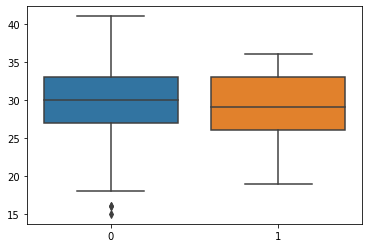

In [61]:
def verificacao_diferenca (string,dados1,dados2):
    rho, pvalue = mannwhitneyu(dados1,dados2)
    print ('Para ', string, 'os valores foram:')
    print ("Valor de rho", rho)
    print ("Valor de pvalue", pvalue)
    if pvalue>0.05:
        print('Grupos iguais falha em rejeitar a hipotese nula')
    else:
        print('Grupos diferentes, rejeitando hipotese nula')
    print('-----------------')
    #sns.boxplot(data = [dados1.dropna(),dados2.dropna()])
    #sns


verificacao_diferenca('satisfacao',dados_masculinos.satisfacao,dados_femininos.satisfacao)
verificacao_diferenca('instabilidade_equipe',dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe)
verificacao_diferenca('instabilidade_tarefa', dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa)
verificacao_diferenca('instabilidade_tecnica', dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica)
verificacao_diferenca('Gerenciamento_Stress', dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress)
verificacao_diferenca('Resolucao_Problemas', dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas)
verificacao_diferenca('Gerenciamento_Emergencia', dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia)
verificacao_diferenca('Aprendizado', dados_masculinos.Aprendizado ,dados_femininos.Aprendizado)
verificacao_diferenca('Interpersoal', dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
verificacao_diferenca('Burnout_cinismo', dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo)
verificacao_diferenca('Burnout_exaustao', dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao)
verificacao_diferenca('Burnout_eficacia', dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia)
#plt.boxplot([dados_masculinos.instabilidade_equipe.dropna(),dados_femininos.instabilidade_equipe.dropna()])
#plt

sns.boxplot(data= [dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia])
print(dados_masculinos.Burnout_eficacia.describe())
print(dados_femininos.Burnout_eficacia.describe())

count    344.000000
mean      16.098837
std        4.194485
min        3.000000
25%       13.750000
50%       17.000000
75%       19.000000
max       21.000000
Name: satisfacao, dtype: float64
count    69.000000
mean     15.130435
std       4.620648
min       3.000000
25%      13.000000
50%      16.000000
75%      19.000000
max      21.000000
Name: satisfacao, dtype: float64


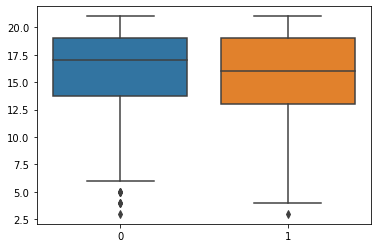

In [62]:
sns.boxplot(data= [dados_masculinos.satisfacao ,dados_femininos.satisfacao])
print(dados_masculinos.satisfacao.describe())
print(dados_femininos.satisfacao.describe())

count    380.000000
mean      22.463158
std        3.693567
min        7.000000
25%       20.000000
50%       23.000000
75%       25.000000
max       28.000000
Name: Resolucao_Problemas, dtype: float64
count    72.000000
mean     20.763889
std       3.690464
min      12.000000
25%      18.000000
50%      21.000000
75%      24.000000
max      28.000000
Name: Resolucao_Problemas, dtype: float64


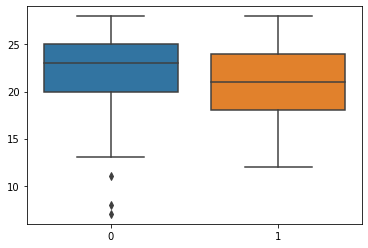

In [57]:
dados.idade.describe()
sns.boxplot(data= [dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas])
print(dados_masculinos.Resolucao_Problemas.describe())
print(dados_femininos.Resolucao_Problemas.describe())

count    380.000000
mean      24.878947
std        2.729895
min       13.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       28.000000
Name: Interpersoal, dtype: float64
count    72.000000
mean     24.194444
std       3.124816
min      16.000000
25%      22.000000
50%      25.000000
75%      27.000000
max      28.000000
Name: Interpersoal, dtype: float64


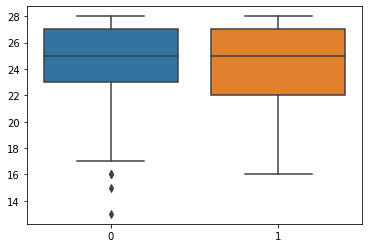

In [58]:
sns.boxplot(data= [dados_masculinos.Interpersoal ,dados_femininos.Interpersoal])
print(dados_masculinos.Interpersoal.describe())
print(dados_femininos.Interpersoal.describe())

/home/danilo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfacao', ylabel='Density'>

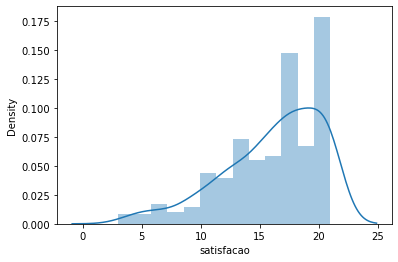

In [59]:
sns.distplot(dados_masculinos.satisfacao)

/home/danilo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfacao', ylabel='Density'>

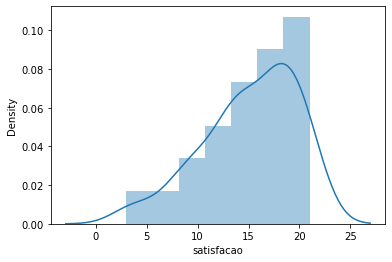

In [60]:
sns.distplot(dados_femininos.satisfacao)